<a href="https://colab.research.google.com/github/obaidsi/Audio-mixer-LTspice/blob/main/AudioMixer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction**

---
This project builds a complete analog audio mixing console as a modular signal chain and validates each stage using LTspice simulation. The work is based on a structured set of lab specifications (Lab 2 → Lab 3 → Lab 4), but it is presented here as an engineering build-and-verify project rather than a lab report.

The goal is to develop practical confidence with:

Op-amp real-world limitations (slew rate and large-signal behavior)

Active analog building blocks used in audio: voltage follower, summing amplifier, integrator (with stabilization), differentiator, and equalizer sections

Frequency-response verification (Bode magnitude/phase) and time-domain verification (transient behavior)

System integration using a block-level approach (subcircuits/hierarchy) and verifying the final end-to-end response

Each stage will be implemented in LTspice, measured with consistent test setups, and documented in this Colab notebook with schematic screenshots + plot screenshots + short engineering notes.*italicized text*



**Final System Diagram**
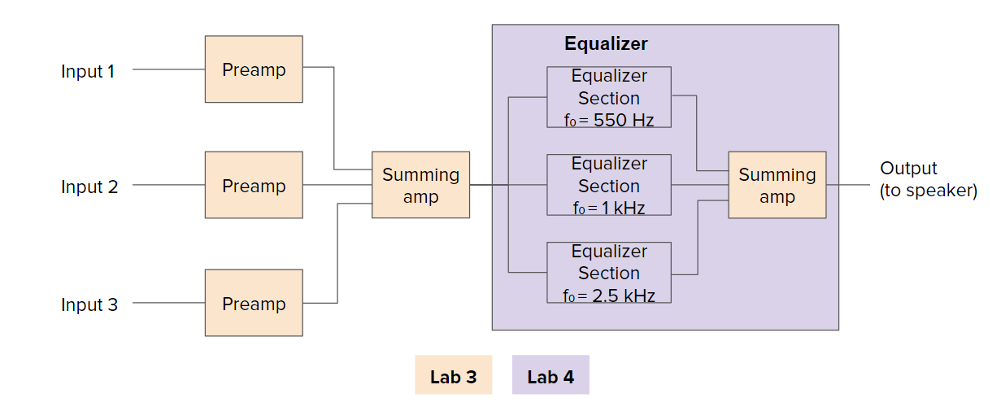

**Phase 0**— Project Setup & Documentation Rules (applies to every step)

Why this matters: keeps your notebook clean and “professional engineering log” style.

Standard simulation settings (use consistently):

Supplies: ±12 V unless the step says otherwise

AC Sweep (audio band): 20 Hz → 20 kHz, log scale (e.g., 100 pts/dec)

Extended sweeps (when required): 1 Hz → 1 MHz or 200 kHz depending on step

Always show:

screenshot of schematic

screenshot of Bode plot (magnitude in dB; phase shown when relevant)

screenshot of transient waveform when requested

Notebook template for each step:

Goal (1–2 lines)

Circuit (LTspice schematic screenshot)

Simulation setup (what analysis + parameters)

Results (plots + cursor measurements)

Notes (3–6 bullets: what you learned / what limitation appears)

**Phase 1** — Lab 2: Op-Amp Characterization + Summing Mixer Core
Step 1.1 — Op-amp limitation check using a Voltage Follower

Purpose: before designing filters/mixers, quantify a non-ideal op-amp behavior.

Build:

Voltage follower (buffer): output fed back to inverting input

Input: square wave (labs use ±10 V, 3 kHz, 50% duty)

Run: Transient

Measure the time it takes output to transition and settle after an edge

Compute slew rate (V/µs)

Compare your measured slew rate against the op-amp model/datasheet expectation (in your notes)

Capture screenshots:

Follower schematic

Transient plot (Vin and Vout) with cursor measurement

Output to notebook:

Measured slew rate value + one paragraph explaining what slew rate limits in real circuits (why it matters for audio, large signals, and high frequencies)